# **Quantum Computing — the soft way**
### *QPlayLearn*

## **Installation**

First of all, we start by installing packages in the current environment. Note that these packages will not be installed on your local machine

In [ ]:
# Qiskit is the open-source library for quantum computing founded by IBM
! pip install qiskit qiskit-aer qiskit-ibm-runtime 
! pip install matplotlib pylatexenc

## **Importing packages**

We import all the packages we are going to need to run the code. 
<br> N.B. Remember to run this cell before every Sandbox!

In [2]:
# Qiskit is the open-source library for quantum computing founded by IBM
import qiskit as qk
from qiskit.quantum_info import Statevector # to get the state coefficients
from qiskit_aer import AerSimulator # to run circuits on the quantum computer simulator
from qiskit.visualization import plot_bloch_multivector, plot_bloch_vector, plot_histogram

# Packages for graphical representations and plots
import matplotlib as mpl
import matplotlib.pyplot as plt

# Math library
import numpy as np

## **QC SANDBOX #1 - Amplitude game**

Let's start by creating a simple quantum circuit with 1 qubit. We can represent it visually as we saw earlier in the course.

In [ ]:
# Create a quantum circuit with 1 qubit
num_qubits = 1
qc = qk.QuantumCircuit(num_qubits)

# Apply a X gate on the qubit
# qc.x(0)

# Play with other single qubit gates!
# qc.y(0)
# qc.h(0)


# Draw a graphical representation of the circuit (using matplotlib)
# print(qc)

The X gate transform the initial state into $|\psi_{final} \rangle = X |\psi_{initial}\rangle$, and, at this point, we should be able to calculate by hand the result. However, on Qiskit we can quickly check it in the form of the array of coefficients or amplitudes $$ |\psi_{final}\rangle = a |0 \rangle + b |1 \rangle =  [a, b]$$

In [ ]:
# Compute the final state of the quantum circuit. Note that j is the imaginary unit
psi = Statevector(qc)
print("|psi_final> = ", psi.data)

**Bloch sphere representation**

We can visualize the representation of $|\psi_{final} \rangle$ on the Bloch sphere. Is it what you were expecting?

In [ ]:
# Plot its representation in the Bloch sphere
plot_bloch_multivector(qc)

A generic single qubit state $|\psi \rangle = a| 0 \rangle + b| 1 \rangle$ can be visualised via the relations between complex coefficients $a$ and $b$ and the spherical coordinates on the Bloch sphere $\theta$, $\varphi$. You can derive them yourself in the In-depth content of Chapter 2, or use the function defined below.

In [ ]:
def coeff_to_sphere(a,b):
    """
    Calculate spherical coordinates for the Bloch sphere from state coefficients
    """
    b_phase = np.arctan2( np.imag(b),np.real(b)) 
    a_phase= np.arctan2( np.imag(a),np.real(a))
    phi = b_phase - a_phase

    a_magn = np.sqrt(np.real(a)**2 + np.imag(a)**2)
    theta=2*np.acos(a_magn)
    return theta, phi

For example, let's see the case of $$| \psi \rangle = \frac{i}{\sqrt{2}} | 0 \rangle +\frac{1}{\sqrt{2}} |1 \rangle$$

In [ ]:
# These are the state coefficients
a = 1j/np.sqrt(2)
b = 1/np.sqrt(2)

# Obtain spherical coordinates
theta, phi = coeff_to_sphere(a,b)

# Plot its representation in the Bloch sphere, using spherical coordinates this time!
plot_bloch_vector([1, theta, phi], coord_type='spherical')


**Let's play the Amplitude Game!**<br> Now that you've seen it on the Bloch sphere, build the circuit to realise the final state  $$| \psi \rangle = \frac{i}{\sqrt{2}} | 0 \rangle +\frac{1}{\sqrt{2}} | 1 \rangle$$
Tip: remember the action of each gate on the Bloch sphere!

In [ ]:
# Amplitude game circuit
num_qubits = 1
qc = qk.QuantumCircuit(num_qubits)

# ???

print(qc)

# [to delete] psi = Statevector(qc)
# [to delete] print("|psi> = ", psi.data)
# [to delete] plot_bloch_multivector(qc)


## **QC SANDBOX #2 - Bell states**

When working with multiple qubits, we can use the same commands to apply gates and check the final state's coefficients.



**Note on ordering**

The ordering of qubits and state coefficients can be *tricky*. A generic state of two qubits is
$$ \begin{split} | \psi \rangle &= a|00 \rangle+b |01 \rangle+c|10 \rangle+d |11 \rangle \\ &= a|\ 0_{q_0} \ 0_{q_1} \  \rangle+b | \ 0_{q_0} \ 1_{q_1} \ \rangle +c | \ 1_{q_0} \ 0_{q_1} \ \rangle +d | \ 1_{q_0} \ 1_{q_1} \ \rangle \\ &=  [a,b,c,d] \end{split} $$


where the notation $ | \ 0_{q_0} \ 0_{q_1} \ \rangle$ indicates the computational basis state where the first qubit labelled $q_0$ is in state $| 0 \rangle$ and the second qubit $q_1$ is in state $| 0 \rangle$, $ | \ 1_{q_0} \ 0_{q_1} \ \rangle $ where the the first qubit $q_0$ is in state $| 1 \rangle$ and the second qubit $q_1$ in state $|0 \rangle$, and so on. This is the conventional ordering followed by physics textbooks, where qubits are ordered from left to right, with $q_0$ on the leftmost side. 

Qiskit uses a reversed ("little-endian") order, coming from computational science
$$ | \psi \rangle_{\text{qiskit}} = a | \ 0_{q_1} \ 0_{q_0} \ \rangle     +    c    | \ 0_{q_1} \ 1_{q_0} \ \rangle + b   | \ 1_{q_1} \ 0_{q_0} \ \rangle   +    d     | \ 1_{q_1} \ 1_{q_0} \ \rangle $$
where we see that the first qubit is on the righmost side. So, when printing the coefficients for the same state as above in Qiskit we get
$$ | \psi\rangle_{\text{qiskit}} = [a,c, b,d] $$

This difference can affect how you interpret the results of your quantum operations!

For more information on how it works for more than 2 qubits, check out this official video: https://www.google.com/url?sa=t&source=web&rct=j&opi=89978449&url=https://www.youtube.com/watch%3Fv%3DEiqHj3_Avps&ved=2ahUKEwih8-rf6LaMAxU6HhAIHZjaJzsQwqsBegQICRAG&usg=AOvVaw1yhPsErDu4JlaYCN5DKQ68

**End of the Note**

In [15]:
# Create a circuit with more qubits
num_qubits = 4
qc = qk.QuantumCircuit(num_qubits)

# Apply a layer of single qubit gates
# ???
# [to delete] for n in range(num_qubits):
# [to delete]   qc.h(n)

# Apply a CNOT gate, specify both target and control
# qc.cx( , )

# [to delete] control_qubit_index = 0
# [to delete] target_qubit_index = 1
# [to delete] qc.cx(control_qubit_index, target_qubit_index)

# Draw a representation of the circuit and compute the state
# ???

**Entanglement**

If there are more than one qubit, we can play with entanglement. We have seen how to create a maximally entangled state, or Bell state, via combination of $ \text{H}$ and $\text{CNOT}$ gates

In [22]:
# We create the Bell state we have seen earlier in the course
num_qubits = 2
qc = qk.QuantumCircuit(num_qubits)

qc.h(0)
qc.cx(0,1)
print(qc)


     ┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘


**Measurement**

We are now familiar with the idea that in the mathematical representation of the quantum states, the squared modulus of the amplitudes tells us the probability of finding the qubits in the states of the computational basis.
 
On a quantum device, we can extract information only through measurement. A single measurement is not enough, and we need instead to run the circuit and measure many times, to estimate the probabilities of finding the qubits in the states of the computational basis. 
 
**Let’s see what this means in practice**

If we look at the mathematical expression for the Bell state, we read that we have equal probability 1/2 of finding the qubits in $|00 \rangle  $ or $|11 \rangle  $. This means that half the times we run the experiments (half the number of “shots”) we should get 00 as output, and 11 the other half. What happens if we run the experiments only 1, 10, or 1000 times? The probability estimates converge with the number of shots.

Measurement outcomes
 {'00': 1}


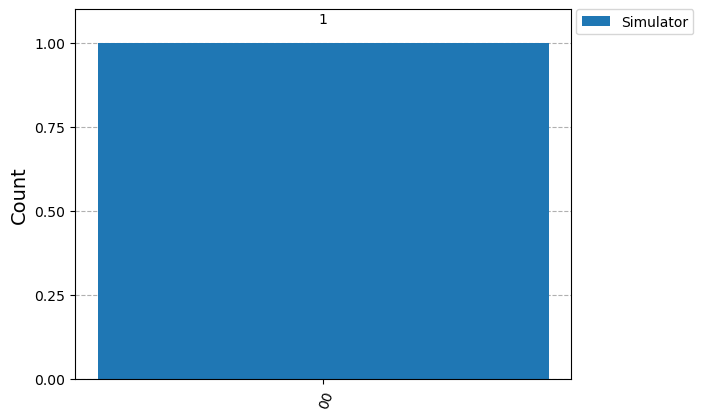

In [46]:
# Set AerSimulator from Qiskit as a backend to run the circuit — check the second part of the course to go to real devices
sim_bknd = AerSimulator()

#Create circuit and measure all qubits at the end of the circuit
num_qubits = 2
qc = qk.QuantumCircuit(num_qubits)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

# Run the circuit on the backend and get the results
num_shots = 1
res = sim_bknd.run(qc, shots = num_shots).result()
counts = res.get_counts()
# Print the results 
print("Measurement outcomes\n", counts)

plot_histogram([counts], 
               legend=['Simulator'])

**Your turn!**

For a system of two qubits, there are in total 4 maximally entangles, or Bell, states: 
$$\begin{split} &|\Phi^+ \rangle  = \frac{1}{\sqrt{2}} ( | 00 \rangle  + | 11 \rangle ) \\ &| \Phi^- \rangle  = \frac{1}{\sqrt{2}} ( |00 \rangle  - | 11 \rangle ) \\ &| \Psi^+ \rangle  = \frac{1}{\sqrt{2}} ( | 01 \rangle  + | 10 \rangle ) \\ &|\Psi^- \rangle  = \frac{1}{\sqrt{2}} ( | 01 \rangle  - | 10 \rangle ) \end{split} $$
Do you recognise it? You've already realised $| \Phi^+ \rangle $. We challenge you to create and measure the remaining three.

In [34]:
# Create a circuit to realise the 3 remaining Bell states
# num_qubits = 
# qcBells = qk.QuantumCircuit(num_qubits)

# ???

# print(qcBells)

## **QC SANDBOX #3 - Teleportation protocol**

We’ll guide you throuugh the steps of the algorithm, but the actual code is on you! Decide if you want to write it cell by cell, or all together at the end


##### 1 -  Three qubits are involved the protocol. Alice has two qubits with her, Bob has the third one.
Qubits are initialised in state $| 000 \rangle $

In [19]:
# Your turn! 
# ???

##### 2 - Alice and Bob share a pair of entangled qubits in $| \Phi^+ \rangle  $
Qubits are in state $| 0 \rangle | \Phi^+ \rangle  = \frac{1}{\sqrt{2}} (| 000 \rangle  + | 011 \rangle )$

In [16]:
# ???

##### 3 - Alice encodes in the first qubit an unknown state $| \psi \rangle  = a| 0 \rangle  + b | 1 \rangle $ to teleport
Prepare an arbitrary state on the third qubit for Alice — you will know it but Alice and Bob don’t. At this point, qubits should be in state $| \psi \rangle | \Phi^+ \rangle  = a | 0 \rangle  | \Phi^+ \rangle  + b | 1 \rangle  | \Phi^+ \rangle  = \frac{1}{\sqrt{2}} \bigl[a (| 000 \rangle  + | 011 \rangle ) + b (| 100 \rangle  + | 111 \rangle ) \bigr]$

In [ ]:
# ???

##### 4 - Alice wants to entangle her two qubits — of course she uses a CNOT on qubit 1 and 2 and a Hadamard gate on qubit 1
Pheeew, the expression for the state is quiet long, but bear with us $$ \begin{split} H & \frac{1}{\sqrt{2}} \bigl[a (|000 \rangle  + |011 \rangle ) + b (|110 \rangle  + |101 \rangle ) \bigr] = \\ & =\frac{1}{\sqrt{2}} \Biggl[ a \biggl(\frac{| 0 \rangle +|1\rangle}{\sqrt{2}}| 00 \rangle  + \frac{|0 \rangle +| 1 \rangle }{\sqrt{2}} | 11 \rangle  \biggr) + b \biggl(\frac{| 0 \rangle - | 1 \rangle }{\sqrt{2}}|10 \rangle  + \frac{|0 \rangle -| 1 \rangle }{\sqrt{2}}| 01 \rangle  \biggr) \Biggr] \end{split}$$

In [ ]:
# ???

##### 5 - Alice measures her 2 qubits. To understand why, let’s give a look at the state. She has equal probability 1/ 4 to measure either 00, 10, 01, or 11
The long expression above can in fact be rewritten in a more useful way — feel free to verify it yourself for practice
$$\frac{1}{2} \biggl[ | 00 \rangle ( \alpha | 0 \rangle + \beta | 1 \rangle) + | 10 \rangle ( \alpha| 0 \rangle - \beta | 1 \rangle)  + | 01 \rangle( \alpha |1 \rangle + \beta | 0 \rangle) + |11 \rangle ( \alpha | 1 \rangle - \beta | 0 \rangle) \biggr] $$

In [ ]:
# ???

##### 6 - Alice sends Bob the bitstring she got as a result— N.B. a piece of classical information, not quantum!
When measuring her qubits, Alice perturbed the system and irretrievably lost $| \psi \rangle$. Bob can act on his qubit according to the message received to teleport $| \psi \rangle$.

By looking at the expression above, if Alice sends <br>
$00 \ \longrightarrow$ Bob's qubit is in $a| 0 \rangle + b | 1 \rangle \  \longrightarrow$ Bob does nothing, he already has $| \psi \rangle$ <br>
$10 \ \longrightarrow$ Bob's qubit is in $a | 0 \rangle - b | 1 \rangle \  \longrightarrow$  Bob applies $Z$ <br>
$01 \ \longrightarrow$ Bob's qubit is in $a | 1 \rangle + b | 0 \rangle \  \longrightarrow$ Bob applies $X$ <br>
$11 \ \longrightarrow$ Bob's qubit is in $a | 1 \rangle - b | 0 \rangle\  \longrightarrow$ Bob applies $X$ then $Z$<br>


In [17]:
# ???
# if outcome == 11 then ...

